# Data exploration

Notebook used to look at data before implementing ML pipeline

In [1]:
%matplotlib inline

import gym
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
frames_distinct = []
frames_consequent = []

In [3]:
env = gym.make('Breakout-v0')
observation = env.reset()
for t in range(1000):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if t % 25 == 0:
        frames_distinct.append(observation)
    if t > 50 and t < 100:
        frames_consequent.append(observation)
    if done:
        print("Episode finished after {} timesteps".format(t + 1))
        break
env.close()

Episode finished after 172 timesteps


In [4]:
np.shape(frames_distinct[0])

(210, 160, 3)

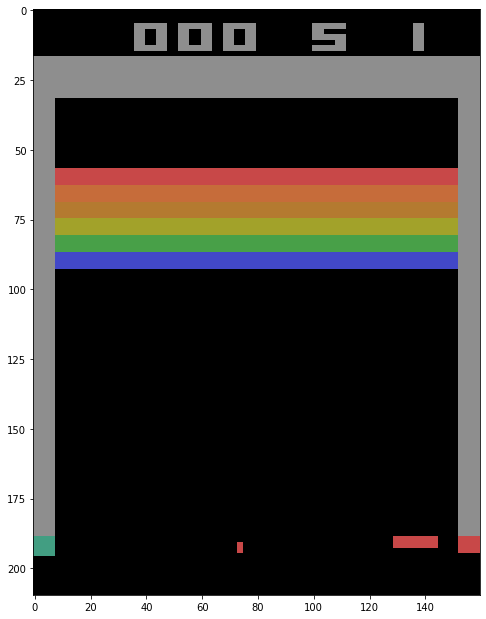

In [5]:
width, height = 8, 16
fig = plt.figure(figsize=(width, height))
fig.add_subplot()
plt.imshow(frames_distinct[1], interpolation='nearest')

### Distinct frames

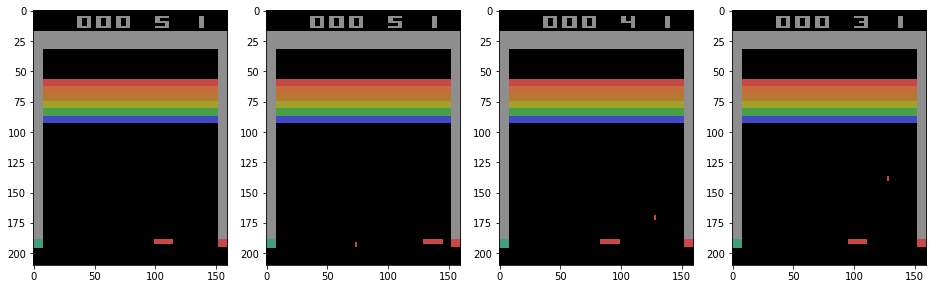

In [6]:
width, height = 16, 8
fig = plt.figure(figsize=(width, height))
for i in range(4):
    fig.add_subplot(1, 4, i + 1)
    plt.imshow(frames_distinct[i], interpolation='nearest')

### Consequent frames

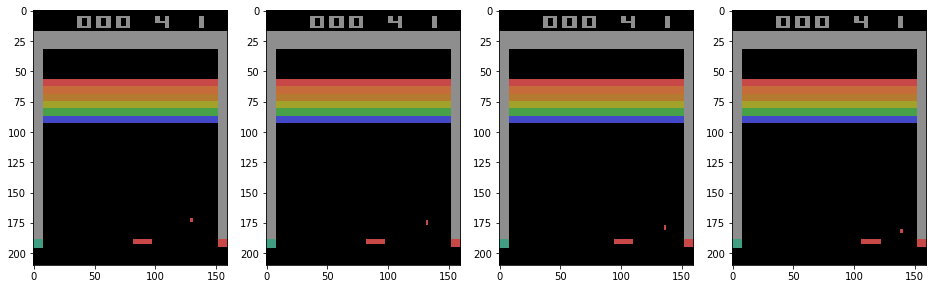

In [7]:
width, height = 16, 8
fig = plt.figure(figsize=(width, height))
for i in range(4):
    fig.add_subplot(1, 4, i + 1)
    plt.imshow(frames_consequent[i], interpolation='nearest')

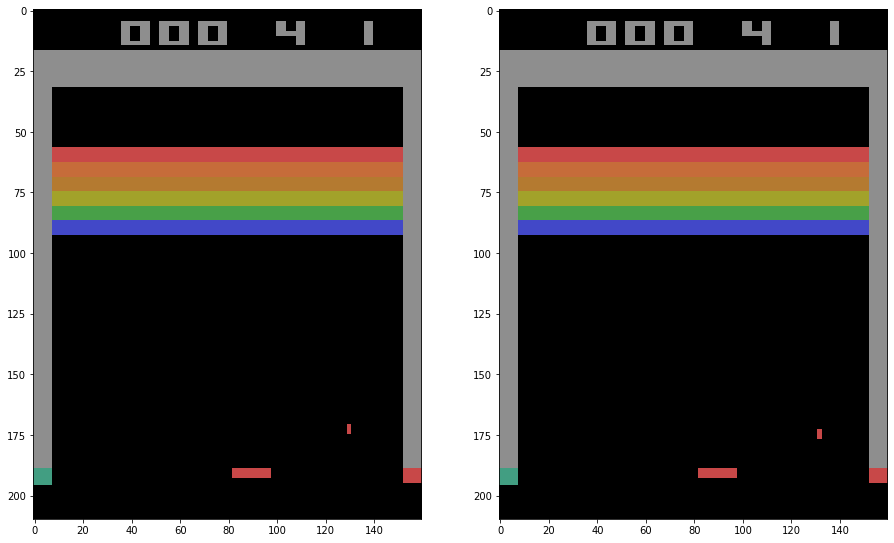

In [8]:
width, height = 32, 16
fig = plt.figure(figsize=(width, height))
for i in range(2):
    fig.add_subplot(1, 4, i + 1)
    plt.imshow(frames_consequent[i], interpolation='nearest')

### Slow motion

In [9]:
env = gym.make('Breakout-v0')
observation = env.reset()
for t in range(1000):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t + 1))
        break
    time.sleep(0.05)
env.close()

Episode finished after 303 timesteps


### Conclusion

Observed frames (mainly the consequent ones) don't seem to show anything, that we would need to compensate for throughout preprocessing. It can be noticed that the projectile changes it's shape (in some frames, it is wider with smaller height, in others it seems higher and slimmer). Providing single frame as observation wouldn't seem to be problem in this case, expect for the fact that single frame can't capture the state of game completely (eg we can't infer in which way does the projectile travel.

The authors suggest to combine consequent frames during preprocessing to adjust for flickering (difference odd / even frame). However, in this particular case we see that expect for the changing shape of projectile, this part of preprocessing would have little effect on outcome. Converting to gray-scale, downsampling and cropping frames is almost a must in order the provide the algorithm with suitable input. Stacking several frames to create a single input is the way authors decided to deal with the problem concerning observation of game state. 